# Descenso del gradiente:  Regresión Lineal 

En esta sección vamos implementar varias versiones del [algoritmo del descenso del gradiente](https://en.wikipedia.org/wiki/Gradient_descent) para resolver el problema de la regresión lineal planteado en [este ejercicio](chapter2-linear-regression) sin necesidad de usar una fórmula cerrada que nos da el valor óptimo de los parámetros del modelo. 

Supongamos que tenemos un modelo de regresión capaz de estimar una variable objetivo $y$ mediante un conjunto de parámetros $\theta$

$$\hat{y} = h_\theta(x)$$

y supongamos que queremos encontrar $\hat{\theta}$ óptimo tal que $C(\hat{y}, y)$ sea lo más pequeño posible, donde $C$ es una función de coste a definir, como puede ser el error cuadrático medio (MSE). El algorimo del descenso del gradiente propone aproximar $\hat{\theta}$ mediante los siguientes pasos

1. Inicializar de forma aleatoria $\theta^0$. 
2. Para cada $i>0$, calculamos $\theta^i$ como 

$$
\theta^i = \theta^{i-1} - \eta\nabla_\theta C(\theta^{i-1})
$$

donde $\nabla$ es el operador gradiente y $\eta$ es la tasa de aprendizaje o *learning rate*. 

## Regresión Lineal

Consideremos ahora el problema de la regresión lineal, donde queremos inferir una relación lineal entre una variable objetivo $y$ y un conjunto de variables regresoras $x = (x_1, \dots, x_n)$ a partir de un conjunto de $m$ observaciones $(x^1, y^1), \dots, (x^m, y^m)$

$$
h_\theta(x) = \theta_0 + \theta_1x_1 + \dots \theta_nx_n
$$

y nuestra función de coste es el error cuadrático medio, 

$$
C(\hat{y}, y) = \frac{1}{m}\sum_{i=1}^m (\hat{y}^i - y^i)^2
$$

Para aplicar el algoritmo del descenso del gradiente, primero tenemos que calcular el gradiente de la función de coste respecto a los parámetros del modelo. Gracias a la simplicidad de nuestro modelo, podemos derivar directamente la fórmula para obtener 

$$
\frac{\partial C}{\partial \theta_j} = \frac{2}{m}\sum_{i=1}^m (\hat{y}^i - y^i)\frac{\partial \hat{y}_i}{\partial\theta_j} = 
\frac{2}{m}\sum_{i=1}^m (\theta\cdot x^i - y^i)x_j^i \qquad 1 \leq j \leq n
$$

Si escribimos esta fórmula en su forma matricial, obtenemos 

$$
\nabla_\theta C(\theta) = \frac{2}{m}X^t(X\theta - y) 
$$

donde 

$$
X = 
\begin{pmatrix}
1 & x^1_1 & \cdots & x^1_n \\
1 & x^2_1 & \cdots & x^2_n \\
\vdots & \vdots & \cdots & \vdots \\
1 & x^m_1 & \cdots & x^m_n \\
\end{pmatrix}, \qquad 
\theta = 
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{pmatrix}, \qquad
y = 
\begin{pmatrix}
y^0 \\
y^1 \\
\vdots \\
y^n
\end{pmatrix}
$$

Implementemos el algoritmo del dencenso de gradiente en Python usando Numpy. Para ello necesitamos algunos hiperparámetros
- El número de iteraciones del algoritmo: `n_iter`, 
- La tasa de aprendizaje: `eta`

:::{exercise}
:label: gradient-descend-1

Crea una clase `RegresionLinealDG` con 3 métodos:
- `__init__`: inicializa los atributos `eta`, `n_iter` al crear instancias. Usar valores por defecto `eta=0.1`, `n_iter=1000`. 
- `entrena`: toma como inputs un array `X` de dimensión `(m, n)` e `y` de dimensión `(m,)`, donde `m` representa el número de observaciones totales y `n` es el número de variables regresoras. Genera  
    - un atributo `thetas` que será una lista donde se guarden arrays de dimensión `n` representando cada una de las iteraciones del algoritmo de descenso del gradiente.
    - otro atributo `costes` que será una lista donde se guarden cada uno de los valores de la función de coste en cada iteración del algoritmo. 
- `predice`: tomo como input un array `X` de dos dimensiones, cuya segunda dimensión es `n` y utiliza el último elemento de `thetas` para realizar predicciones según nuestro modelo lineal.

:::

In [1]:
%config InlineBackend.figure_format='retina'

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class RegresionLinealDG:

    def __init__(self, eta=0.1, n_iter=1000):
        self.eta = eta
        self.n_iter = n_iter
        self.rng = np.random.default_rng()

    def entrena(self, X, y):
        m, n = X.shape
        X_ones = self.añade_unos(X)
        self.thetas = [2*self.rng.random(n + 1) - 1]
        self.costes = [self.f_coste(X_ones, y, self.thetas[-1])]
        for iter in range(self.n_iter):
            theta = self.thetas[-1] - self.eta*self.calcula_grad(X_ones, y, self.thetas[-1])
            self.thetas.append(theta)
            self.costes.append(self.f_coste(X_ones, y, self.thetas[-1]))

    def añade_unos(self, X):
        m = X.shape[0]
        X_ones = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        return X_ones

    def f_coste(self, X, y, theta):
        m = X.shape[0]
        cost = np.mean((X @ theta - y)**2) / m
        return cost

    def calcula_grad(self, X, y, theta):
        m = X.shape[0]
        grad = X.T @ (X @ theta - y)* 2 / m
        return grad

    def pinta_datos(self, X, y, ax):
        x_1 = X[:, 0]
        ax.scatter(x_1, y, marker="o", label="datos")
        x_1_min, x_1_max = x_1.min(), x_1.max()
        x_sample = [x_1_min, x_1_max]
        for iter in range(0, self.n_iter + 1, self.n_iter // 10):
            theta = self.thetas[iter]
            y_sample = [theta[0] + theta[1]*x_1_min, theta[0] + theta[1]*x_1_max]
            ax.plot(x_sample, y_sample, label=f"iter {iter}")
        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$y$")
        ax.set_title("Convergencia modelo")
        ax.grid()
        ax.legend()
        return ax

    def pinta_coste(self, ax):
        ax.plot(self.costes)
        ax.grid()
        ax.set_xlabel("iteración")
        ax.set_ylabel("coste")
        ax.set_yscale("log")
        ax.set_title("Convergencia función de coste")
        return ax

    def pinta_thetas(self, ax):
        im = ax.scatter(
            [theta[0] for theta in self.thetas], 
            [theta[1] for theta in self.thetas], 
            c = range(self.n_iter + 1),
            marker="x"
        )
        ax.grid()
        ax.set_xlabel("$\\theta_0$")
        ax.set_ylabel("$\\theta_1$")
        ax.set_title("Convergencia de $\\theta$")
        ax = plt.colorbar(im, ax=ax)
        ax.set_label("iteración")
        return ax

    def pinta(self, X, y):
        fig, ax = plt.subplots(1, 3, figsize=(20, 8))
        self.pinta_datos(X, y, ax[0])
        self.pinta_coste(ax[1])
        self.pinta_thetas(ax[2])
        fig.suptitle(self.get_title())
        return fig

    def get_title(self):
        return f"$\eta = ${self.eta}, n_iter = {self.n_iter}"

In [14]:
regresion_lineal_dg = RegresionLinealDG(eta=0.01)
rng_test = np.random.default_rng()
m, n = 100, 1
X_test = rng_test.random((m, n))
test_theta = rng_test.integers(2, 5, size=n)
y_test = 2 + (0.1*rng_test.standard_normal((m, n)) + X_test) @ test_theta

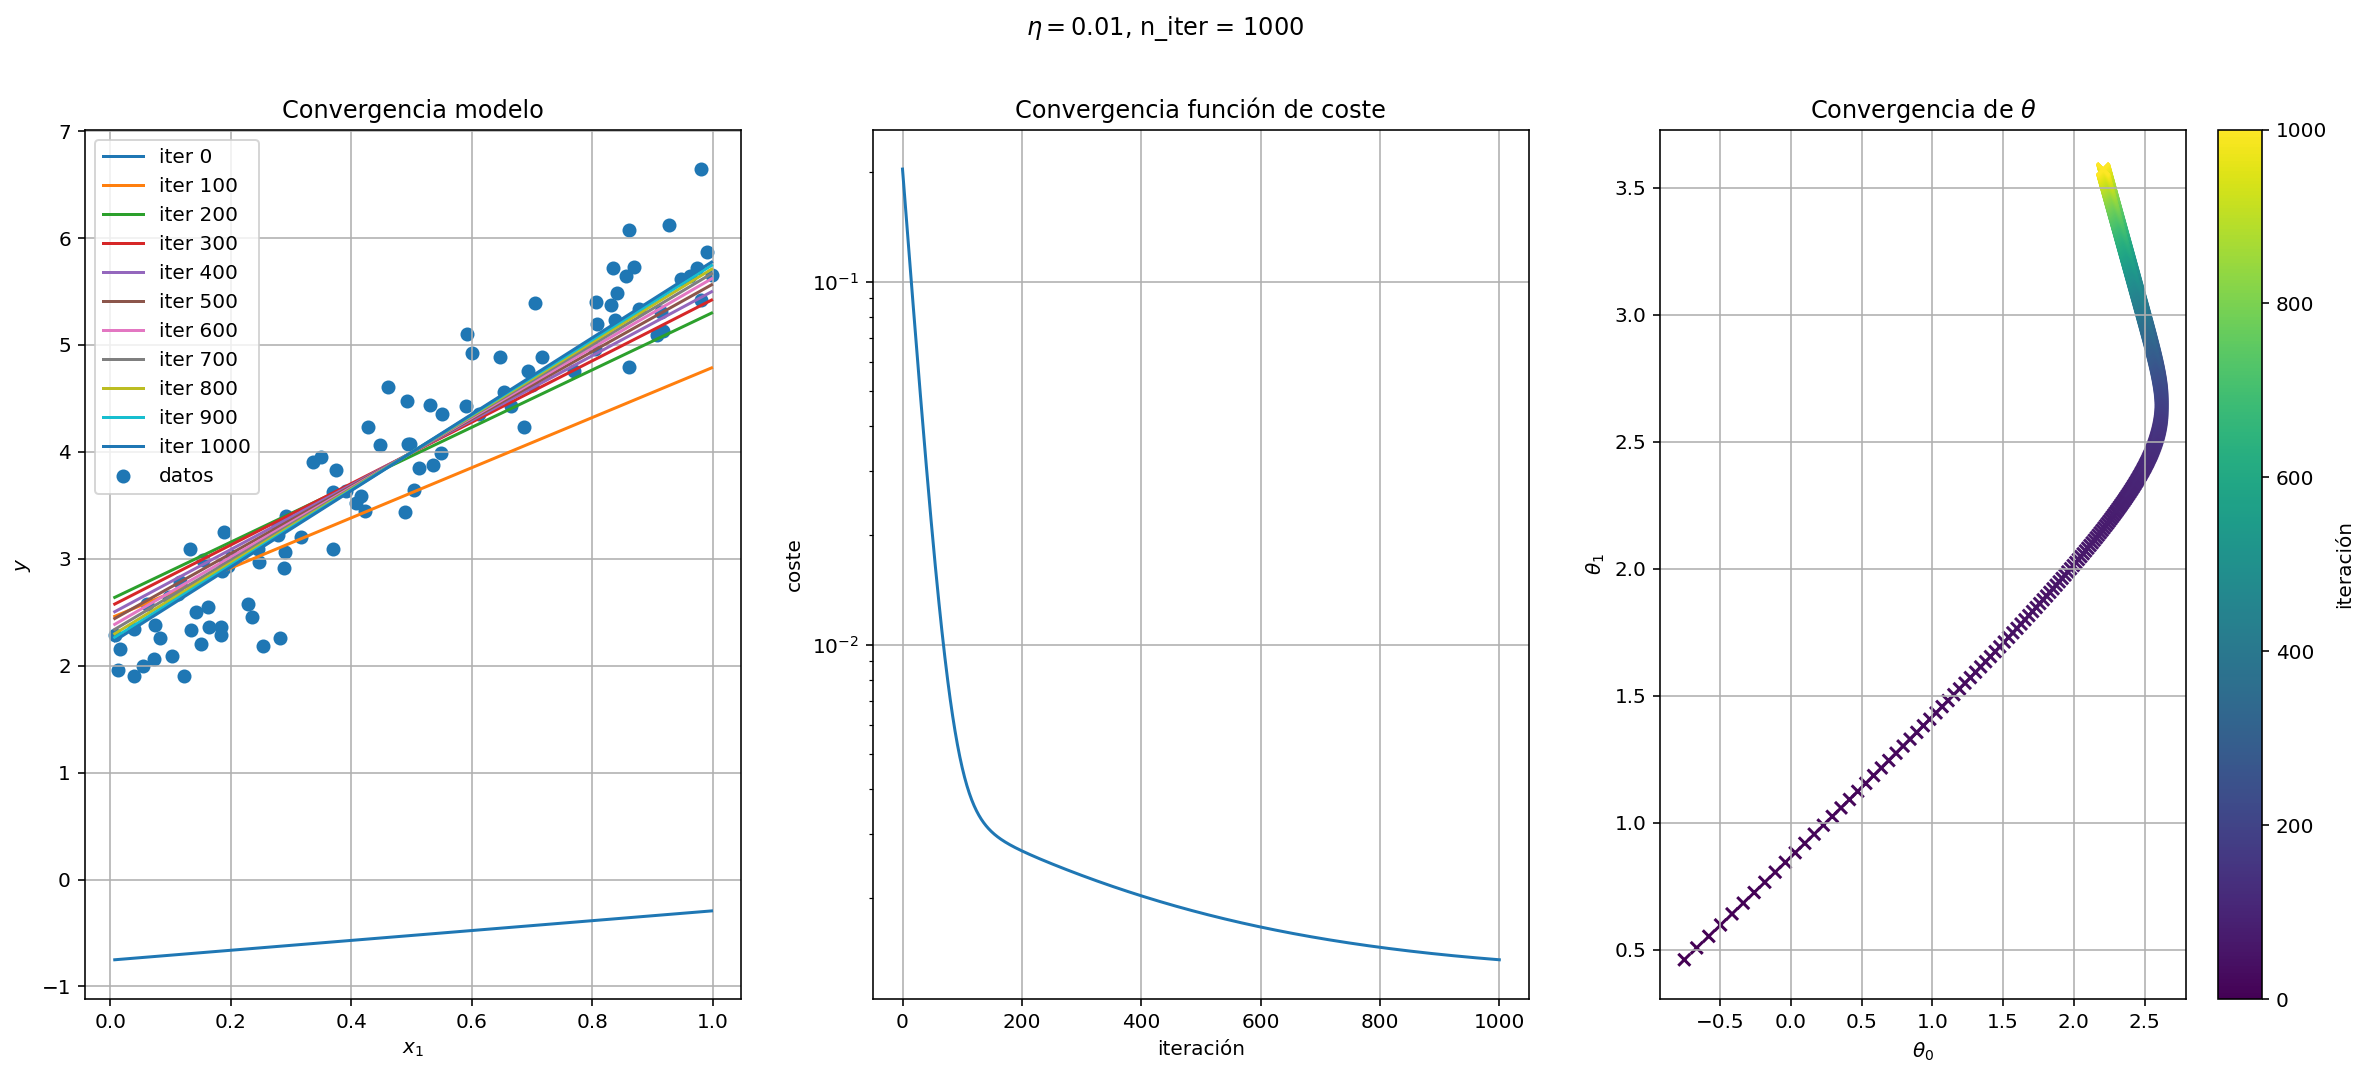

In [15]:
regresion_lineal_dg.entrena(X_test, y_test)
fig = regresion_lineal_dg.pinta(X_test, y_test)

:::{exercise}
:label: gradient-descent-2

Implementa una clase que herede de la anterior en la que la tasa de aprendizaje `eta` sea una función decreciente de modo que vaya disminuyendo en el método entrena en cada iteración. 

:::

In [16]:
class RegresionLinealDG2(RegresionLinealDG):

    def __init__(self, eta, n_iter=1000):
        super().__init__(n_iter=n_iter)
        self.eta = eta

    def entrena(self, X, y):
        m, n = X.shape
        X_ones = self.añade_unos(X)
        self.thetas = [2*self.rng.random(n + 1) - 1]
        self.costes = [self.f_coste(X_ones, y, self.thetas[-1])]
        for iter in range(self.n_iter):
            theta = self.thetas[-1] - self.eta(iter)*self.calcula_grad(X_ones, y, self.thetas[-1])
            self.thetas.append(theta)
            self.costes.append(self.f_coste(X_ones, y, self.thetas[-1]))

    def get_title(self):
        return f"n_iter = {self.n_iter}"

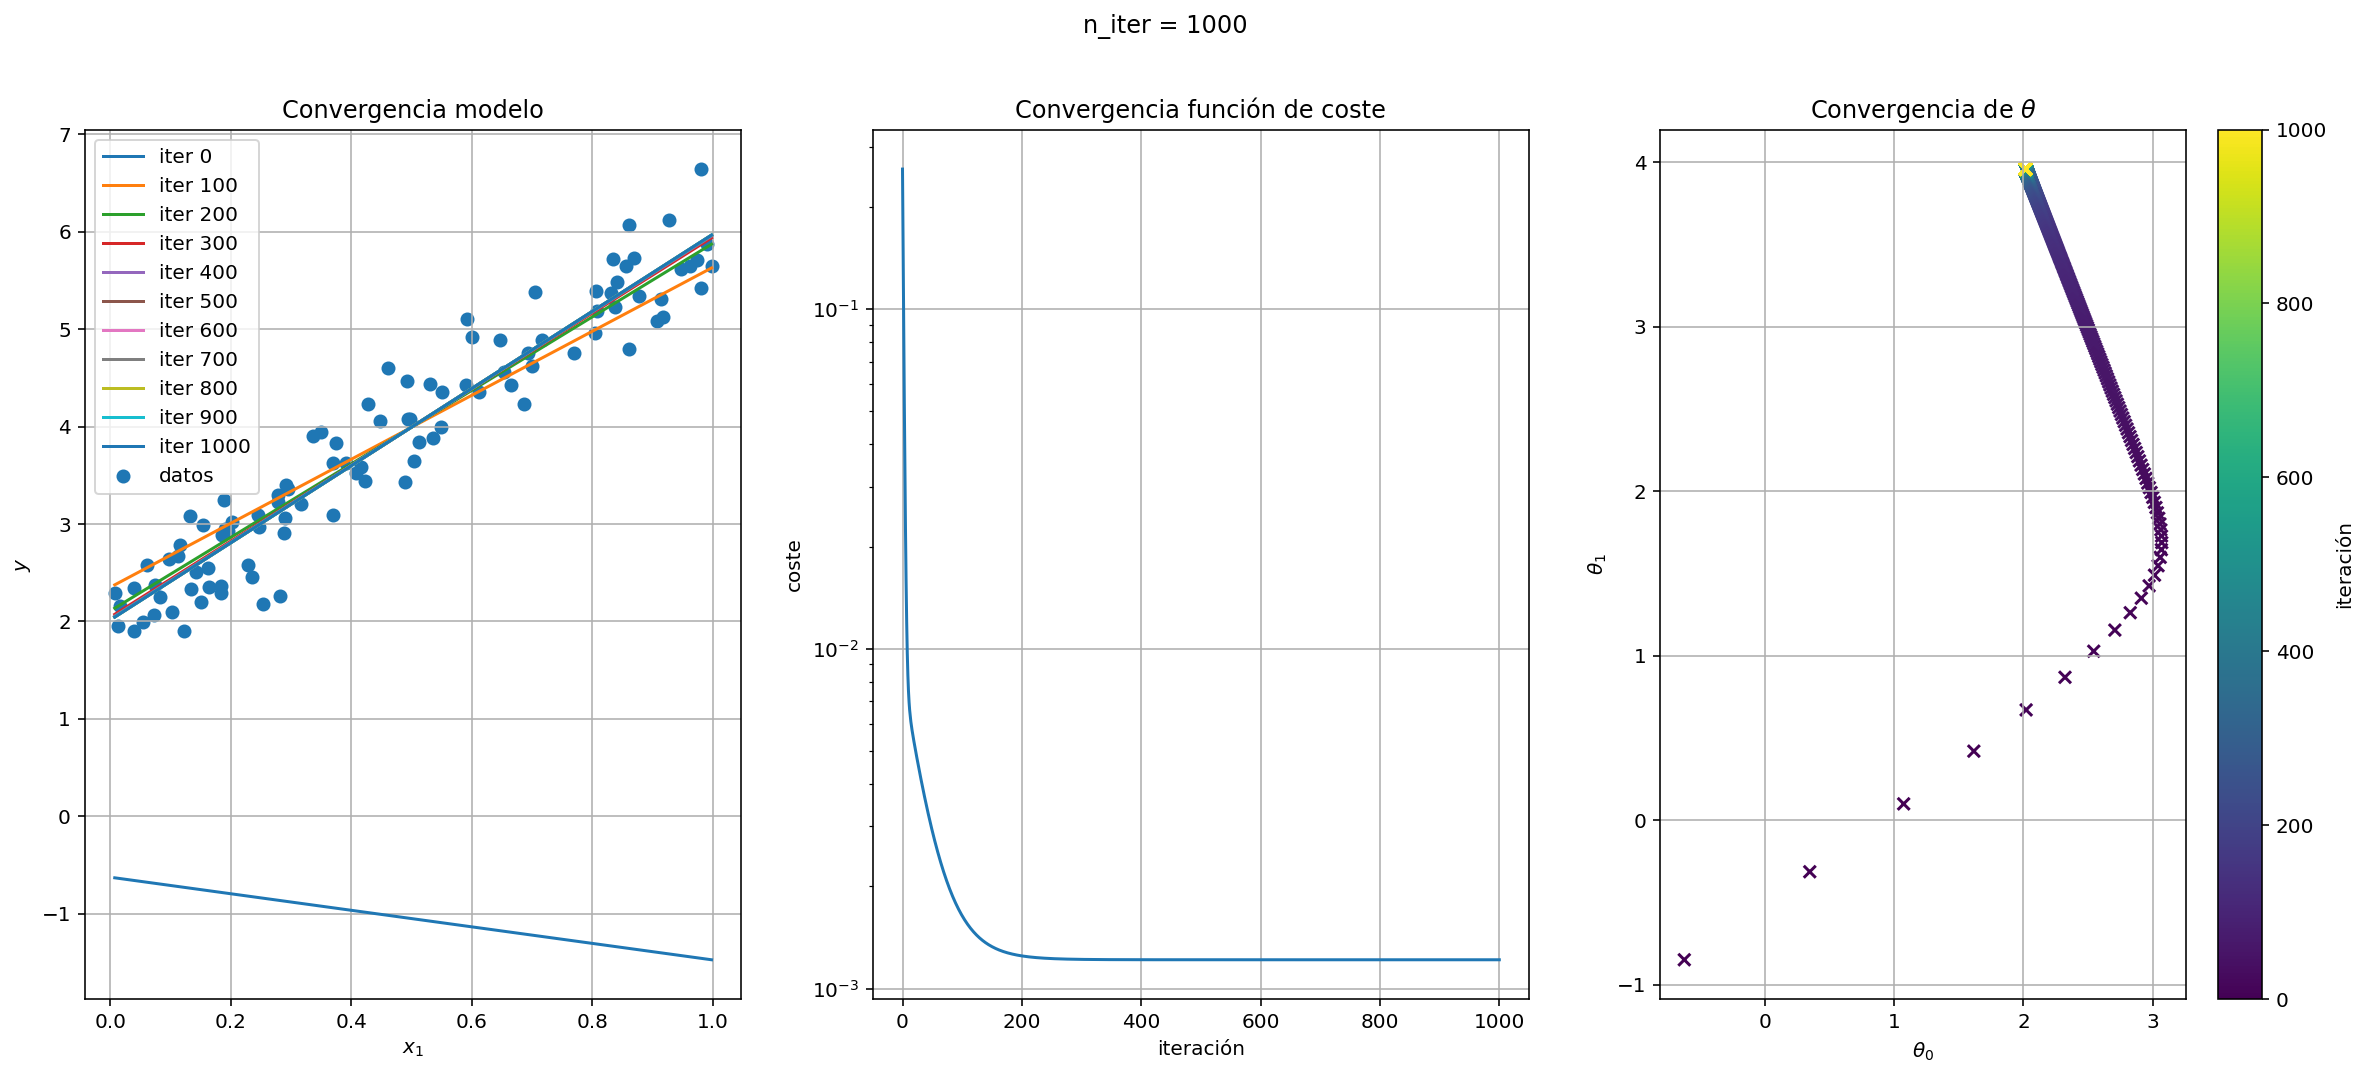

In [17]:
eta = lambda x: 0.1*np.exp(-0.001*x)
regresion_lineal_dg2 = RegresionLinealDG2(eta)
regresion_lineal_dg2.entrena(X_test, y_test)
fig = regresion_lineal_dg2.pinta(X_test, y_test)

:::{exercise}
:label: gradient-descent-2

Mejora de nuevo la clase anterior para que reciba un parámetro booleano `split` (valor por defecto a `True`) de modo que cualdo `split` sea verdadero el conjunto de entrenamiento se divida de forma aletoria en dos partes, una con el 80% de los datos para ejecutar el algoritmo; otra con el 20% para validar y modificar los siguientes métodos: 

- `entrena`: además de generar los atributos `costes`, `thetas`, generaremos `costes_val` con el valor de la función de coste en cada uno de las iteraciones del algoritmo. 

- `pinta_coste` para pintar también la curva de la función de coste en el conjunto de validación. 

:::

In [20]:
class RegresionLinealDG3(RegresionLinealDG2):

    def entrena(self, X, y, val_ratio=0.2):
        m, n = X.shape
        val_set_size = int(m*val_ratio)
        index = self.rng.permutation(m)
        index_train, index_val = index[val_set_size:], index[:val_set_size]
        X_train, X_val = X[index_train], X[index_val]
        y_train, y_val = y[index_train], y[index_val]
        super().entrena(X_train, y_train)
        X_val = self.añade_unos(X_val)
        self.costes_val = [self.f_coste(X_val, y_val, theta) for theta in self.thetas]

    def pinta_coste(self, ax):
        super().pinta_coste(ax)
        ax.plot(self.costes_val, label="validación")
        ax.legend()
        return ax

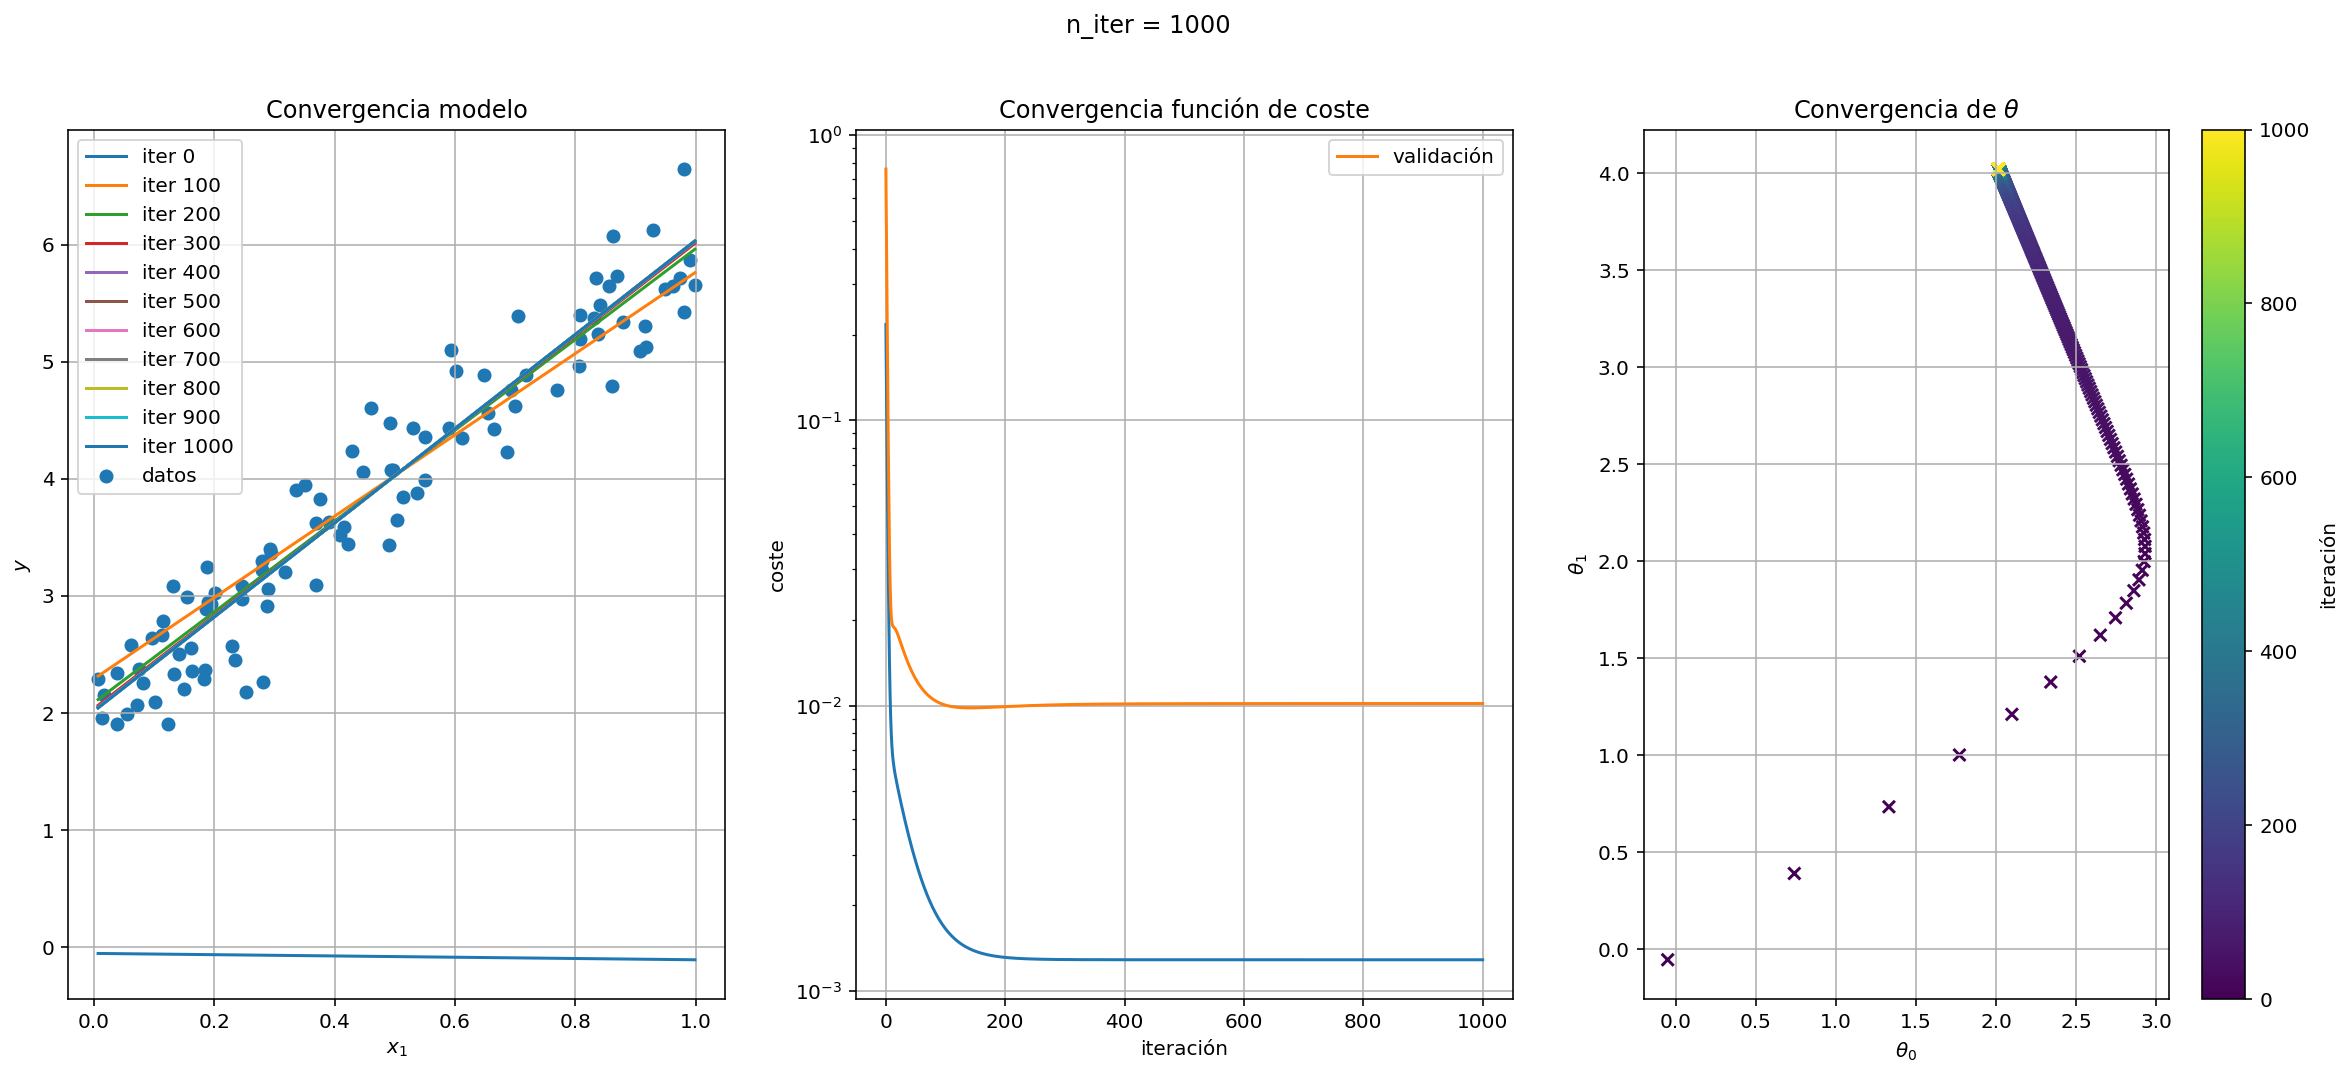

In [21]:
regresion_lineal_dg3 = RegresionLinealDG3(eta)
regresion_lineal_dg3.entrena(X_test, y_test)
fig = regresion_lineal_dg3.pinta(X_test, y_test)